In [2]:
from matplotlib import pyplot as plt
import glob
import numpy as np

In [3]:
import pandas as pd

/home/gear/anaconda3/envs/graph/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


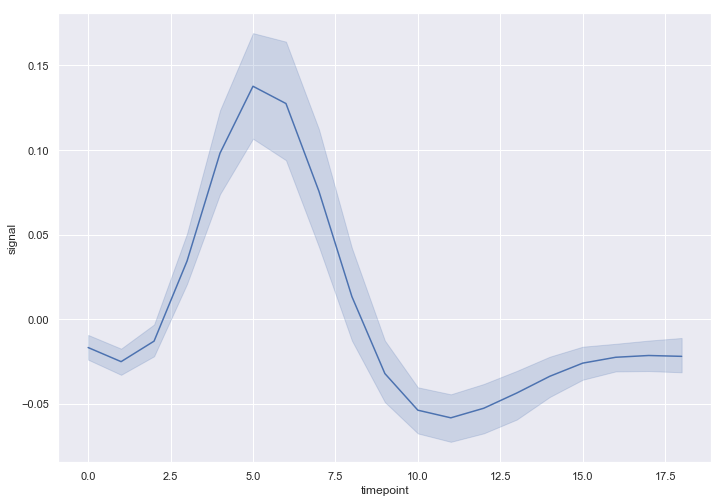

In [4]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
fmri = sns.load_dataset("fmri")
ax = sns.lineplot(x="timepoint", y="signal", data=fmri)

import warnings
warnings.filterwarnings("ignore")

In [5]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


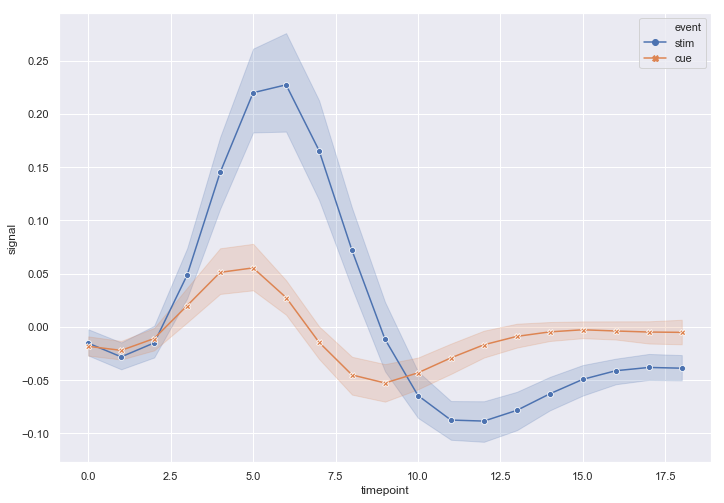

In [6]:
ax = sns.lineplot(x="timepoint", y="signal",
                  hue="event", style="event",
                  markers=True, dashes=False, data=fmri)

In [7]:
def stat(path):
    acc = []
    tacc = []
    for f in glob.glob(path+'*'):
        with open(f) as ff:
            _, train_acc, test_acc = map(float, ff.readline().split(' '))
            acc.append(test_acc)
            tacc.append(train_acc)
    return acc, tacc

In [8]:
a, b = stat("../results/IMDBBINARY/IMDBBINARY_{}".format(0.05))

In [9]:
def df_backward_est(name):
    df = []
    for i in np.linspace(0.05, 0.95, 19):
        noise = str(np.round(i,2)).ljust(4,'0')
        for acc, tacc in zip(*stat("../results/{}/{}_{}".format(name, name, noise))):
            df.append({'noise': noise, 'acc': acc, 'data': 'org_test'})
            df.append({'noise': noise, 'acc': tacc, 'data': 'org_train'})
        for acc, tacc in zip(*stat("../results/{}/estimate_backward_{}_{}".format(name, name, noise))):
            df.append({'noise': noise, 'acc': acc, 'data': 'backward_test'})
            df.append({'noise': noise, 'acc': tacc, 'data': 'backward_train'})
    df = pd.DataFrame(df)
    return df

In [10]:
def df_backward_forward_est(name):
    df = []
    for i in np.linspace(0.05, 0.95, 19):
        noise = str(np.round(i,2)).ljust(4,'0')
        for acc, tacc in zip(*stat("../results/{}/{}_{}".format(name, name, noise))):
            df.append({'noise': noise, 'acc': acc, 'data': 'org_test'})
            df.append({'noise': noise, 'acc': tacc, 'data': 'org_train'})
        for acc, tacc in zip(*stat("../results/{}/estimate_backward_{}_{}".format(name, name, noise))):
            df.append({'noise': noise, 'acc': acc, 'data': 'backward_test'})
            df.append({'noise': noise, 'acc': tacc, 'data': 'backward_train'})
        for acc, tacc in zip(*stat("../results/{}/estimate_forward_{}_{}".format(name, name, noise))):
            df.append({'noise': noise, 'acc': acc, 'data': 'forward_test'})
            df.append({'noise': noise, 'acc': tacc, 'data': 'forward_train'})
    df = pd.DataFrame(df)
    return df

In [11]:
def df_backward_exact(name):
    df = []
    for i in np.linspace(0.05, 0.95, 19):
        noise = str(np.round(i,2)).ljust(4,'0')
        for acc, tacc in zip(*stat("../results/{}/{}_{}".format(name, name, noise))):
            df.append({'noise': noise, 'acc': acc, 'data': 'org_test'})
            df.append({'noise': noise, 'acc': tacc, 'data': 'org_train'})
        for acc, tacc in zip(*stat("../results/{}/exact_backward_{}_{}".format(name, name, noise))):
            df.append({'noise': noise, 'acc': acc, 'data': 'exact_backward_test'})
            df.append({'noise': noise, 'acc': tacc, 'data': 'exact_backward_train'})
    df = pd.DataFrame(df)
    return df

In [12]:
IMDBBINARY_est = df_backward_est("IMDBBINARY")

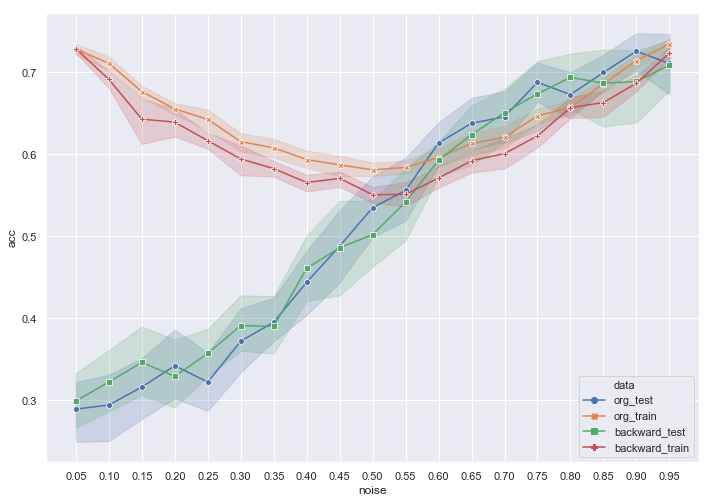

In [13]:
ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=IMDBBINARY_est)

In [14]:
IMDBMULTI_est = df_backward_est("IMDBMULTI")

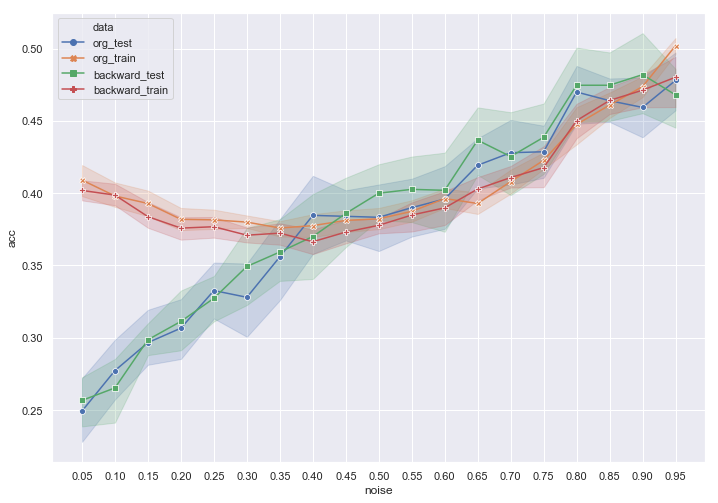

In [15]:
ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=IMDBMULTI_est)

In [16]:
PROTEINS_est = df_backward_forward_est("PROTEINS")

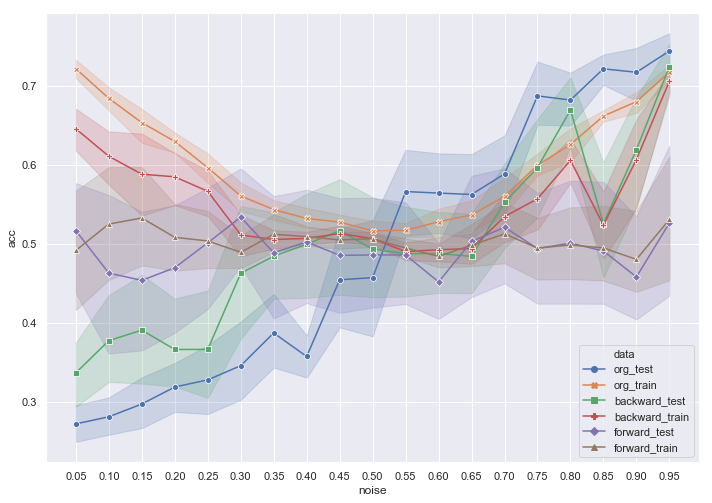

In [17]:
ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=PROTEINS_est)

In [18]:
MUTAG_exact = df_backward_exact("MUTAG")

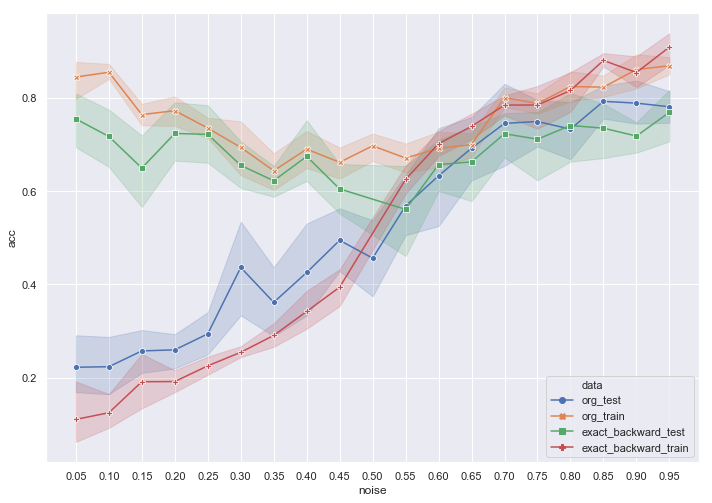

In [19]:
ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=MUTAG_exact)

In [20]:
NCI1_est = df_backward_forward_est("NCI1")

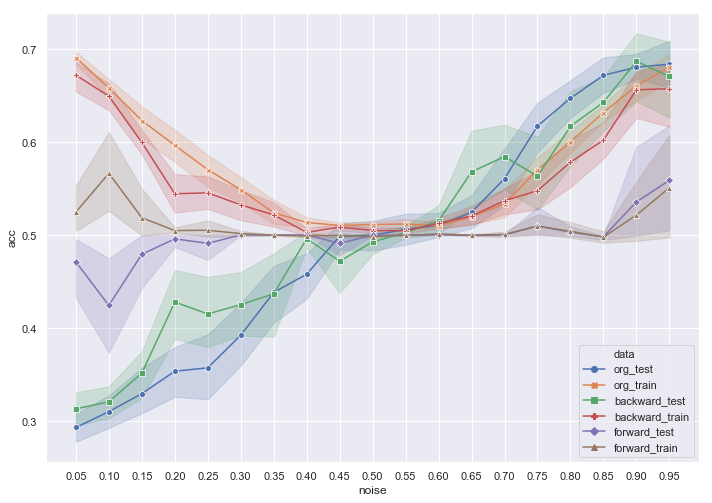

In [21]:
ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=NCI1_est)

In [22]:
PTC_est = df_backward_forward_est("PTC")

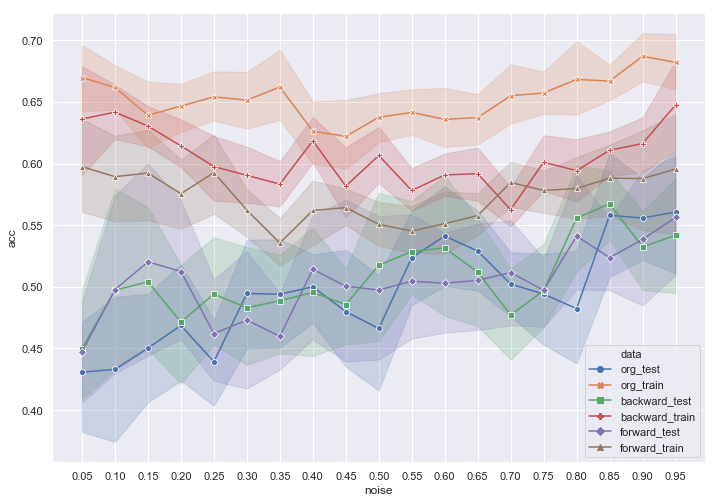

In [23]:
ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=PTC_est)

In [26]:
stat("../results/REDDITBINARY/REDDITBINARY_{}".format(noise))

([0.625, 0.775, 0.695, 0.75, 0.795, 0.66, 0.755, 0.695, 0.63, 0.75],
 [0.707222,
  0.795,
  0.688889,
  0.811667,
  0.797222,
  0.652778,
  0.751111,
  0.722222,
  0.667222,
  0.767778])

In [27]:
stat("../results/COLLAB/COLLAB_self_0.05_result_fold_")

([0.115768,
  0.150301,
  0.155689,
  0.188377,
  0.141717,
  0.189621,
  0.218437,
  0.121756,
  0.210421,
  0.150301],
 [0.458546,
  0.445012,
  0.425428,
  0.435237,
  0.428984,
  0.413203,
  0.415241,
  0.450545,
  0.435014,
  0.430571])

In [31]:
COLLAB_est = []
for i in np.linspace(0.05, 0.95, 19):
    noise = str(np.round(i,2)).ljust(4,'0')
    for acc, tacc in zip(*stat("../results/COLLAB/COLLAB_self_{}".format(noise))):
        COLLAB_est.append({'noise': noise, 'acc': acc, 'data': 'org'})
        COLLAB_est.append({'noise': noise, 'acc': tacc, 'data': 'org_train'})
COLLAB_est = pd.DataFrame(COLLAB_est)

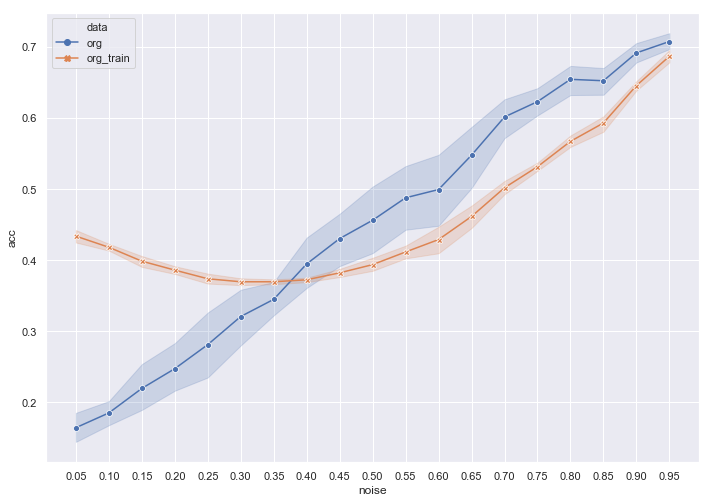

In [32]:
ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=COLLAB_est)

In [34]:
COLLAB_est = []
for i in np.linspace(0.05, 0.95, 19):
    noise = str(np.round(i,2)).ljust(4,'0')
    for acc, tacc in zip(*stat("../results/IMDBMULTI/IMDBMULTI_self_{}".format(noise))):
        COLLAB_est.append({'noise': noise, 'acc': acc, 'data': 'org'})
        COLLAB_est.append({'noise': noise, 'acc': tacc, 'data': 'org_train'})
COLLAB_est = pd.DataFrame(COLLAB_est)

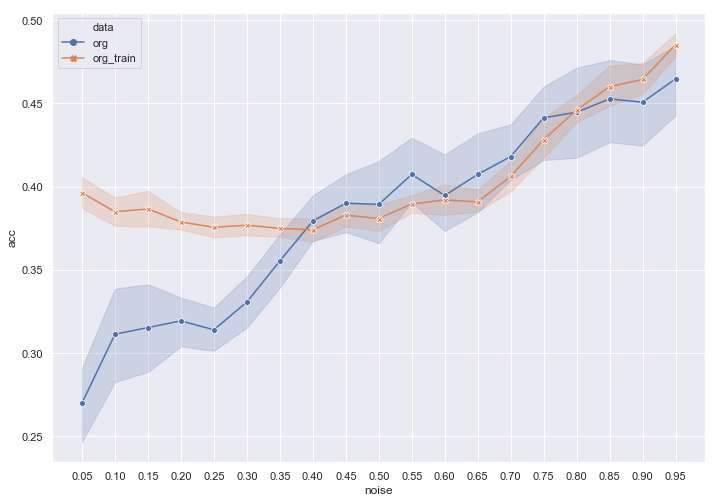

In [35]:
ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=COLLAB_est)

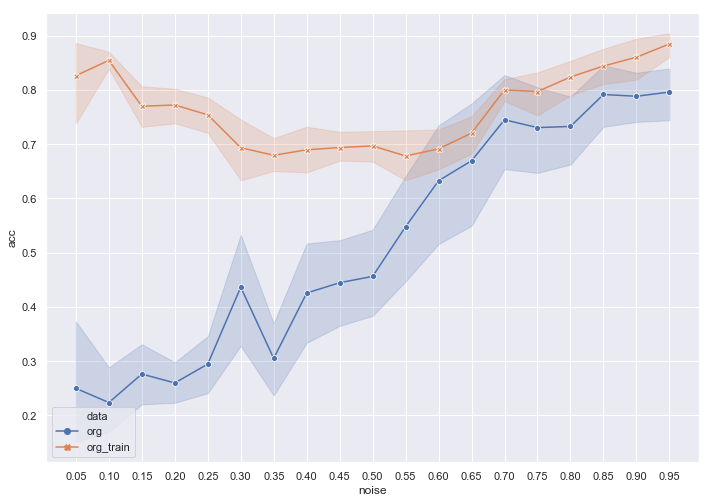

In [36]:
COLLAB_est = []
for i in np.linspace(0.05, 0.95, 19):
    noise = str(np.round(i,2)).ljust(4,'0')
    for acc, tacc in zip(*stat("../results/MUTAG/MUTAG_self_{}".format(noise))):
        COLLAB_est.append({'noise': noise, 'acc': acc, 'data': 'org'})
        COLLAB_est.append({'noise': noise, 'acc': tacc, 'data': 'org_train'})
COLLAB_est = pd.DataFrame(COLLAB_est)

ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=COLLAB_est)

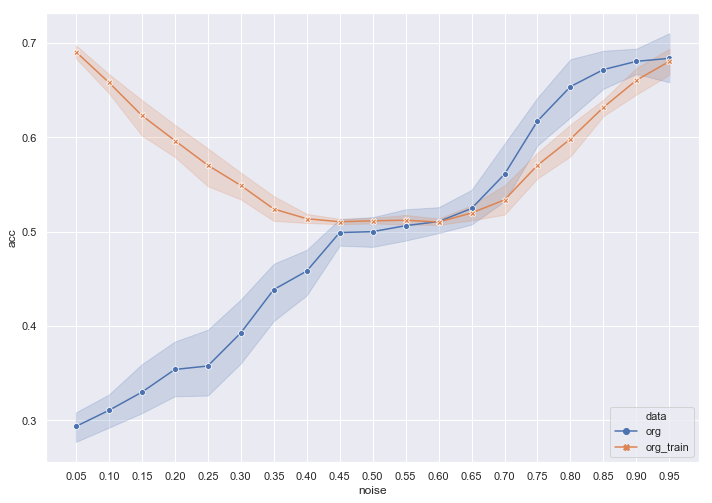

In [37]:
COLLAB_est = []
for i in np.linspace(0.05, 0.95, 19):
    noise = str(np.round(i,2)).ljust(4,'0')
    for acc, tacc in zip(*stat("../results/NCI1/NCI1_self_{}".format(noise))):
        COLLAB_est.append({'noise': noise, 'acc': acc, 'data': 'org'})
        COLLAB_est.append({'noise': noise, 'acc': tacc, 'data': 'org_train'})
COLLAB_est = pd.DataFrame(COLLAB_est)

ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=COLLAB_est)

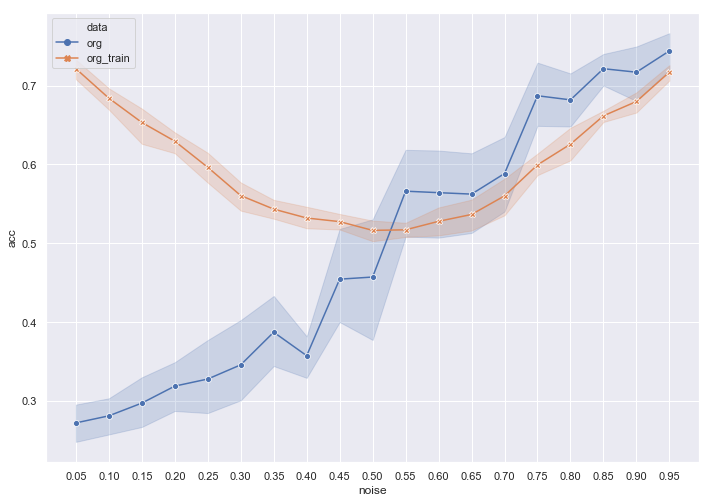

In [38]:
COLLAB_est = []
for i in np.linspace(0.05, 0.95, 19):
    noise = str(np.round(i,2)).ljust(4,'0')
    for acc, tacc in zip(*stat("../results/PROTEINS/PROTEINS_self_{}".format(noise))):
        COLLAB_est.append({'noise': noise, 'acc': acc, 'data': 'org'})
        COLLAB_est.append({'noise': noise, 'acc': tacc, 'data': 'org_train'})
COLLAB_est = pd.DataFrame(COLLAB_est)

ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=COLLAB_est)

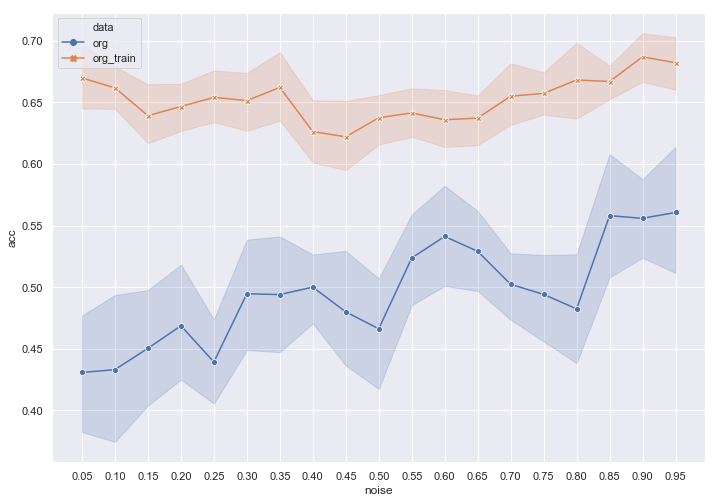

In [39]:
COLLAB_est = []
for i in np.linspace(0.05, 0.95, 19):
    noise = str(np.round(i,2)).ljust(4,'0')
    for acc, tacc in zip(*stat("../results/PTC/PTC_self_{}".format(noise))):
        COLLAB_est.append({'noise': noise, 'acc': acc, 'data': 'org'})
        COLLAB_est.append({'noise': noise, 'acc': tacc, 'data': 'org_train'})
COLLAB_est = pd.DataFrame(COLLAB_est)

ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=COLLAB_est)

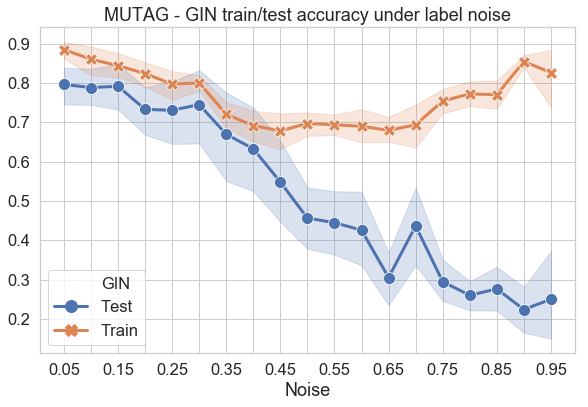

In [158]:
sns.set(rc={'figure.figsize':(3.2*3,2*3), 
            'lines.linewidth': 3, 
            'lines.markersize': 12}, font='Roboto', font_scale=1.5)
sns.set_style("whitegrid")

COLLAB_est = []
for i in np.linspace(0.05, 0.95, 19):
    noise = str(np.round(i,2)).ljust(4,'0')
    for acc, tacc in zip(*stat("../results/MUTAG/MUTAG_self_{}".format(noise))):
        label_noise = str(np.round(1-float(noise),2)).ljust(4,'0')
        COLLAB_est.append({'Noise': label_noise, 'Accuracy': acc, 'GIN': 'Test'})
        COLLAB_est.append({'Noise': label_noise, 'Accuracy': tacc, 'GIN': 'Train'})
COLLAB_est = pd.DataFrame(COLLAB_est)

ax = sns.lineplot(x="Noise", y="Accuracy",
                  hue="GIN", style="GIN",
                  markers=True, dashes=False, 
                  data=COLLAB_est, legend="full")
ax.set_ylabel('')
for j, i in enumerate(ax.xaxis.get_ticklabels()):
    if j % 2 == 1:
        i.set_visible(False)
    else:
        i.set_text('la')
plt.title('MUTAG - GIN train/test accuracy under label noise')
ax.legend(loc='lower left')
fig = ax.get_figure()
fig.savefig("MUTAG_noisy_training.pdf", 
            dpi=400, 
            bbox_inches='tight',
            transparent=True)